# Problem Statement :
New York City Taxi Fare Prediction

## Analytical Approach :Regression
why?
     Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.
     Predicting numerical values: Linear regression can be used to predict numerical values.

# Features
##### date_time_of_pickup -
timestamp value indicating when the taxi ride started.
##### longitude_of_pickup -
float for ude coordinate of where the taxi ride started.
#### latitude_of_pickup -
float for latitude coordinate of where the taxi ride started.
#### longitude_of_dropoff -
float for longitude coordinate of where the taxi ride ended.
#### latitude_of_dropoff -
float for latitude coordinate of where the taxi ride ended.
#### no_of_passenger -
integer indicating the number of passengers in the taxi ride.

# Target
#### amount-
dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Understanding

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.shape

(50000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


# Data Visualization

### Frequency of No. of passengers

<AxesSubplot: xlabel='no_of_passenger', ylabel='Count'>

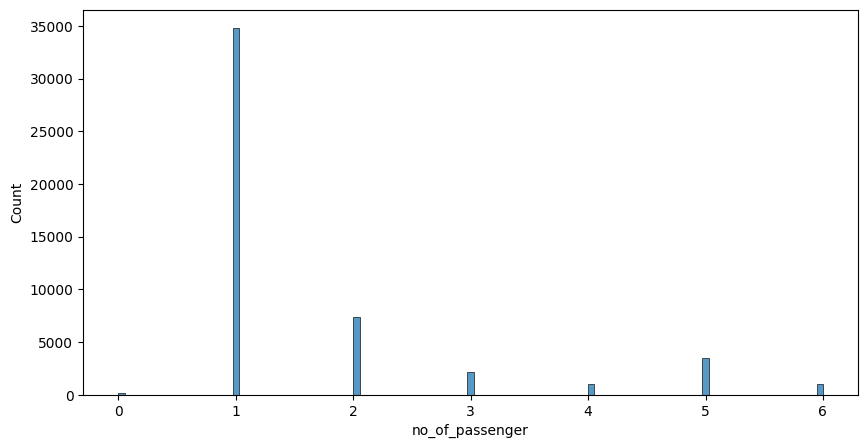

In [ ]:
plt.figure(figsize = (10,5))

sns.histplot(x='no_of_passenger', data=df)

<AxesSubplot: xlabel='no_of_passenger'>

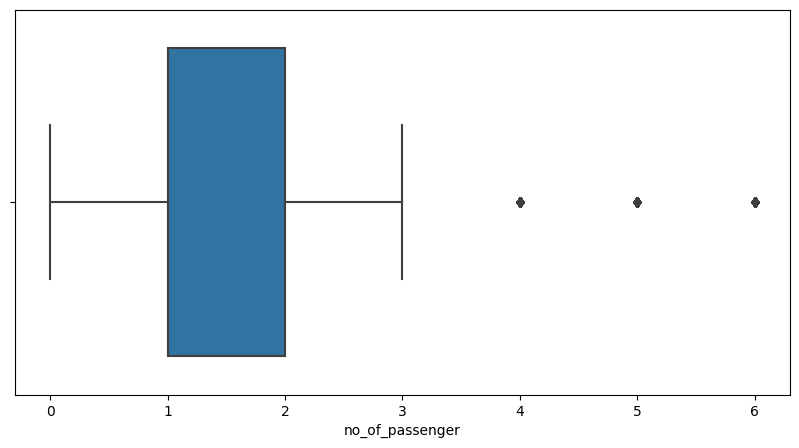

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="no_of_passenger", data=df)

#### The no. of passengers travelling are 1 or 2 mostly

<AxesSubplot: xlabel='longitude_of_pickup'>

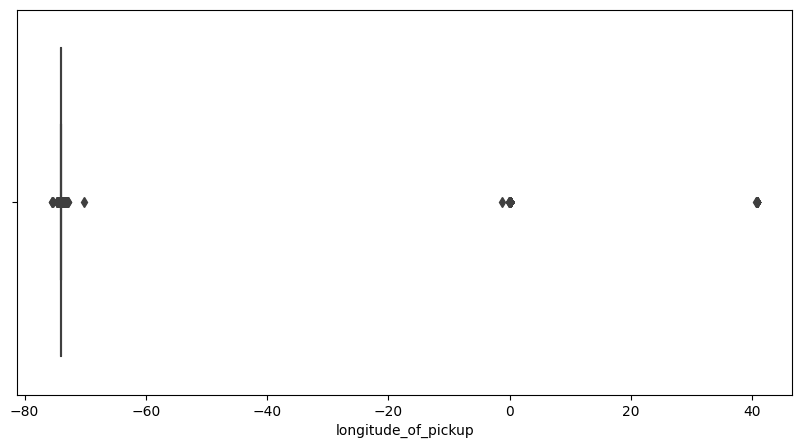

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="longitude_of_pickup", data=df)

<AxesSubplot: xlabel='latitude_of_pickup'>

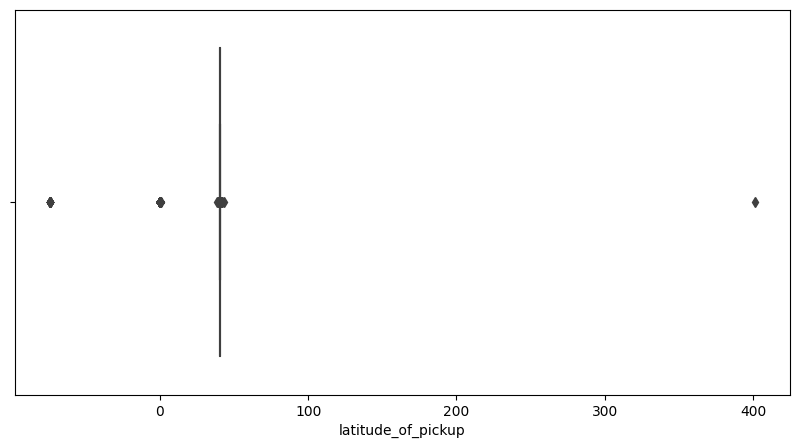

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="latitude_of_pickup", data=df)

<AxesSubplot: xlabel='longitude_of_dropoff'>

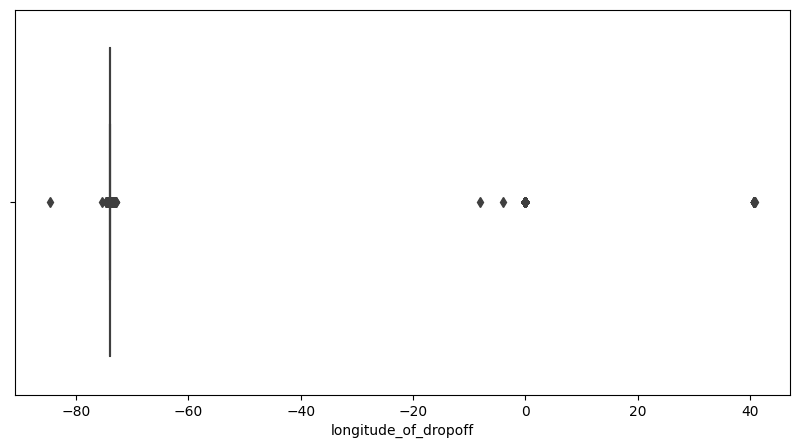

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="longitude_of_dropoff", data=df)

<AxesSubplot: xlabel='latitude_of_dropoff'>

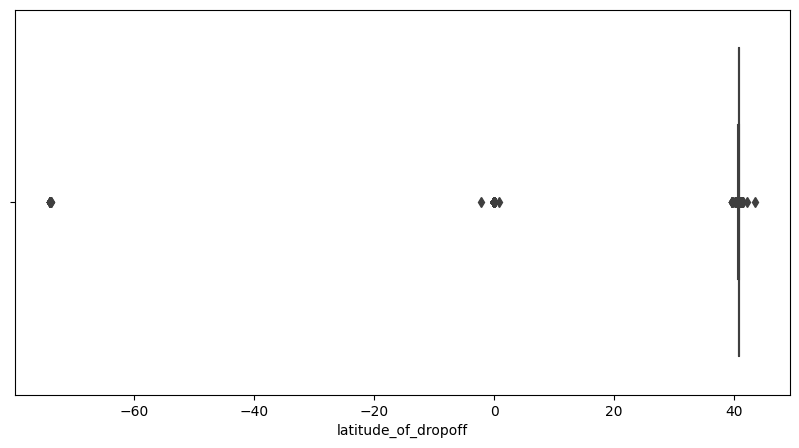

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="latitude_of_dropoff", data=df)

# Heatmap to see correlation of variables with each other

<AxesSubplot: >

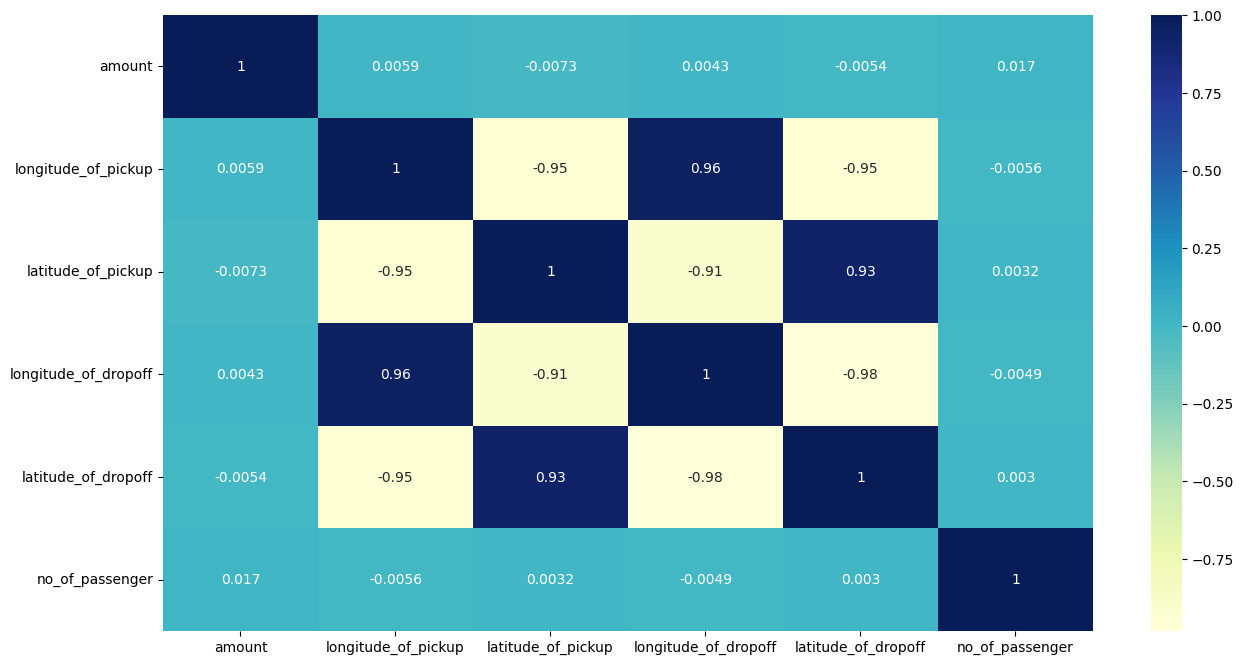

In [ ]:
plt.figure(figsize = (15, 8))
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

# Data Cleaning

In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Data Preparation
#### Removing values in the columns that are equal to zero

In [ ]:
df['longitude_of_pickup'].eq(0).sum()

955

In [ ]:
df.drop(df[df['longitude_of_pickup'] == 0].index, inplace=True)

In [ ]:
df['longitude_of_pickup'].eq(0).sum()

0

In [ ]:
df['latitude_of_pickup'].eq(0).sum()

2

In [ ]:
df.drop(df[df['latitude_of_pickup'] == 0].index, inplace=True)

In [ ]:
df['latitude_of_pickup'].eq(0).sum()

0

In [ ]:
df['longitude_of_dropoff'].eq(0).sum()

43

In [ ]:
df.drop(df[df['longitude_of_dropoff'] == 0].index, inplace=True)

In [ ]:
df['longitude_of_dropoff'].eq(0).sum()

0

In [ ]:
df['latitude_of_dropoff'].eq(0).sum()

0

##### Removing values in amount column that are equal to zero

In [ ]:
(df['amount'] <= 0).sum()

8

In [ ]:
df.drop(df[df['amount'] <= 0].index, inplace=True)

In [ ]:
(df['amount'] <= 0).sum()

0

# Feature Engineering

Converting column from object to date_and_time data type

In [ ]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

In [ ]:
df.dtypes

unique_id                       object
amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
dtype: object

#### Converting Date and time to categorical labels and then converting it into integer type

In [ ]:
# extract day of week and month of year as separate features
df['day_of_week'] = df['date_time_of_pickup'].dt.dayofweek
df['month_of_year'] = df['date_time_of_pickup'].dt.month
df['hour_of_day'] = df['date_time_of_pickup'].dt.hour

In [ ]:
# encode day of week and month of year as categorical variables
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=range(7), ordered=True)
df['month_of_year'] = pd.Categorical(df['month_of_year'], categories=range(1,13), ordered=True)
df['hour_of_day'] = pd.Categorical(df['hour_of_day'], categories=range(0,24), ordered=True)
# print the resulting dataframe
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_week,month_of_year,hour_of_day
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0,6,17
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,1,1,16
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,3,8,0
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,5,4,4
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1,2,6,23
49996,19:18.0,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1,0,6,17
49997,53:00.0,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1,6,1,4
49998,09:00.0,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2,1,11,7


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
day_of_week             0
month_of_year           0
hour_of_day             0
dtype: int64

In [ ]:
df = df.drop('date_time_of_pickup', axis=1)
df

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_week,month_of_year,hour_of_day
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,6,17
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,1,16
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,0
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,5,4,4
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1,3,7
...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2,6,23
49996,19:18.0,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0,6,17
49997,53:00.0,6.9,-74.002698,40.739428,-73.998108,40.759483,1,6,1,4
49998,09:00.0,4.5,-73.946062,40.777567,-73.953450,40.779687,2,1,11,7


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['day_of_week'] = le.fit_transform(df['day_of_week'])

In [ ]:
df['month_of_year'] = le.fit_transform(df['month_of_year'])

In [ ]:

df['hour_of_day'] = le.fit_transform(df['hour_of_day'])

In [ ]:
df.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
day_of_week               int64
month_of_year             int64
hour_of_day               int64
dtype: object

Droping Unique Id column: since it is not necessary for the analysis purpose

In [ ]:
df = df.drop('unique_id', axis=1)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_week,month_of_year,hour_of_day
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,5,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,0,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,7,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,5,3,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1,2,7
...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2,5,23
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0,5,17
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,6,0,4
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,1,10,7


# Train split Data

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
y = df[['amount']]
X = df.drop(['amount'],axis=1)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

# Choosing Model

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
model1.score(X_train,y_train)

0.004093542241487391

In [ ]:
model1.score(X_test,y_test)

-0.11847336383761586

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_2=RandomForestRegressor(max_depth=7, max_features=6, n_estimators=30 )

In [ ]:
model_2.fit(X_train, y_train)

C:\Users\PURVA\AppData\Local\Temp\ipykernel_5160\1281710452.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, max_features=6, n_estimators=30)

In [ ]:
model_2.score(X_train, y_train)

0.7186858612548073

In [ ]:
model_2.score(X_test, y_test)

0.6707993230873289

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_3 = DecisionTreeRegressor(max_depth=6 , max_features='sqrt')
model_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt')

In [ ]:
model_3.score(X_train, y_train)

0.5784196046960784

In [ ]:
model_3.score(X_test, y_test)

0.4600006716295826

# SVR

from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

model_4.score(X_train, y_train)

model_4.score(X_test, y_test)

# SGD

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model_5 = SGDRegressor()
model_5.fit(X_train, y_train)

C:\Users\PURVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [ ]:
model_5.score(X_train, y_train)

-2.000326985124365e+22

In [ ]:
model_5.score(X_test, y_test)

-2.1350654585180487e+22

# Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor


In [ ]:
model_6 = BaggingRegressor(base_estimator= model_3)


In [ ]:
model_6.fit(X_train, y_train)

C:\Users\PURVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:510: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\PURVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                      max_features='sqrt'))

In [ ]:
model_6.score(X_train, y_train)

0.6113144338865203

In [ ]:
model_6.score(X_test, y_test)

0.6009462533257195

# AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
model_7 = AdaBoostRegressor()
model_7.fit(X_train, y_train)

C:\Users\PURVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [ ]:
model_7.score(X_train, y_train)

-0.8039749620949741

In [ ]:
model_7.score(X_test, y_test)

-0.9498103476344784

# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_8 = GradientBoostingRegressor()
model_8.fit(X_train, y_train)

C:\Users\PURVA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [ ]:
model_8.score(X_train, y_train)

0.7686070485887395

In [ ]:
model_8.score(X_test, y_test)

0.7279168140605784

# K nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_9 = KNeighborsRegressor(n_neighbors=10,  leaf_size=15,
    p=4)
model_9.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=15, n_neighbors=10, p=4)

In [ ]:
model_9.score(X_train, y_train)

0.2025327767176136

In [ ]:
model_9.score(X_test, y_test)

0.018489847843204954

# LGBMBoost

In [ ]:
from lightgbm import LGBMRegressor

model_10 = LGBMRegressor()
model_10.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
model_10.score(X_train, y_train)

0.8091359092565191

In [ ]:
model_10.score(X_test, y_test)

0.7827520687384615

# CatBoostRegressor

from catboost import CatBoostRegressor

model_11 = CatBoostRegressor()
model_11.fit(X_train, y_train)

model_11.score(X_train, y_train)

model_11.score(X_test, y_test)

# XGBoostRegressor

In [ ]:
from xgboost.sklearn import XGBRegressor

model_12 = XGBRegressor( max_depth = 2, max_leaves= 5, min_child_weight= 2 )
model_12.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=5, min_child_weight=2,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [ ]:
model_12.score(X_train, y_train)

0.7801014503558328

In [ ]:
model_12.score(X_test, y_test)

0.7427419910315063

# Linear Regression with Standardization

In [ ]:
model_14 = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

In [ ]:
model_14.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
model_14.score(X_train, y_train)

0.004093542241487724

In [ ]:
model_14.score(X_test, y_test)

-0.11847336383761697

### We have chosen LGBMBoost since it is best fit model and has high scores